In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

color_pal = sns.color_palette()
import xgboost as xgb
from sklearn.metrics import mean_squared_error #will give us more penalty for any predictions that is way of 


In [2]:
df = pd.read_csv('C:/Users/user/OneDrive/Desktop/OCIS/Project_ARCSSTE-E/Data/Accra_T2M.csv')

df['Date'] = pd.to_datetime(df['DY'].astype(str) + '-' + df['MO'].astype(str) + '-' + df['YEAR'].astype(str), format='%d-%m-%Y')
df.set_index('Date', inplace=True)


df

,YEAR,MO,DY,T2M
Date,,,,
1982-01-01,1982,1,1,28.15
1982-01-02,1982,1,2,27.83
1982-01-03,1982,1,3,27.49
1982-01-04,1982,1,4,27.58
1982-01-05,1982,1,5,27.33
...,...,...,...,...
2022-12-27,2022,12,27,27.16
2022-12-28,2022,12,28,27.15
2022-12-29,2022,12,29,27.15


In [3]:
df.shape

(14975, 4)

In [4]:
df.drop(['YEAR', 'MO', 'DY'], axis=1, inplace=True)  # Remove columns 'YEAR', 'MO', and 'DY'


In [5]:
df

,T2M
Date,
1982-01-01,28.15
1982-01-02,27.83
1982-01-03,27.49
1982-01-04,27.58
1982-01-05,27.33
...,...
2022-12-27,27.16
2022-12-28,27.15
2022-12-29,27.15


In [6]:
df.shape

(14975, 1)

In [7]:

# Calculate the yearly mean and create dfi DataFrame
df['Year'] = df.index.year
dfi = df.groupby('Year')['T2M'].mean().reset_index()
dfi.columns = ['Year', 'Yearly Mean']
dfi = dfi[['Year', 'Yearly Mean']]

# Output the DataFrame dfi with two columns: 'Year' and 'Yearly Mean'
print(dfi)


    Year  Yearly Mean
0   1982    25.521370
1   1983    25.940192
2   1984    25.878306
3   1985    25.898630
4   1986    25.857671
5   1987    26.679233
6   1988    26.321557
7   1989    26.084055
8   1990    26.242740
9   1991    26.264849
10  1992    26.182459
11  1993    26.137151
12  1994    26.173808
13  1995    26.346219
14  1996    26.173525
15  1997    26.191288
16  1998    26.828959
17  1999    26.274712
18  2000    26.296120
19  2001    26.291890
20  2002    26.385452
21  2003    26.502959
22  2004    26.306721
23  2005    26.351151
24  2006    26.413781
25  2007    26.402712
26  2008    26.525219
27  2009    26.371014
28  2010    26.894384
29  2011    26.417753
30  2012    26.300355
31  2013    26.487260
32  2014    26.569123
33  2015    26.532904
34  2016    26.764044
35  2017    26.541342
36  2018    26.606000
37  2019    26.834110
38  2020    26.639699
39  2021    26.698192
40  2022    26.345589


## VisualizingThe Top 10 Years on Record

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


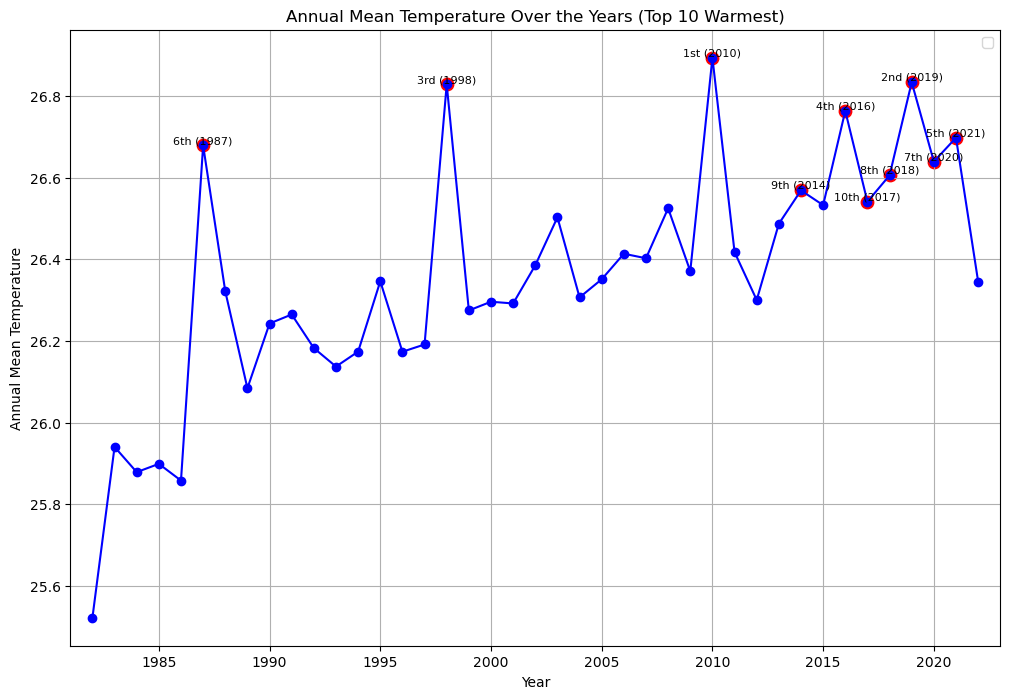

In [327]:
import matplotlib.pyplot as plt

# Sort the DataFrame by Annual Mean Temperature in descending order
dfi_sorted = dfi.sort_values('Yearly Mean', ascending=False)

# Select the top 10 warmest years
top_10_warmest = dfi_sorted.head(10)

# Plot the Annual Mean Temperature
plt.figure(figsize=(12, 8))  # Adjust the figure size

# Plot all data points
plt.plot(dfi['Year'], dfi['Yearly Mean'], marker='o', linestyle='-', color='blue')

# Highlight the top 10 warmest years
for rank, year, temp in zip(range(1, 11), top_10_warmest['Year'], top_10_warmest['Yearly Mean']):
    plt.scatter(year, temp, color='red', s=80)
    plt.text(year, temp, f'{rank}{"st" if rank == 1 else "nd" if rank == 2 else "rd" if rank == 3 else "th"} ({year})', fontsize=8, ha='center', va='bottom')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Annual Mean Temperature')
plt.title('Annual Mean Temperature Over the Years (Top 10 Warmest)')

# Adjust the x-axis limits for better visibility
plt.xlim(dfi['Year'].min() - 1, dfi['Year'].max() + 1)

# Display the legend
plt.legend(loc='best')

plt.grid(True)

# Display the plot
plt.show()


In [33]:
import pandas as pd

# Create a new DataFrame for the top 10 warmest years
top_10_table = top_10_warmest[['Year', 'Yearly Mean']].reset_index(drop=True)

# Set the index starting from 1
top_10_table.index = top_10_table.index + 1

# Rename the columns
top_10_table.columns = ['Rank', 'Yearly Mean']

# Display the table
print(top_10_table)


    Rank  Yearly Mean
1   2010    26.894384
2   2019    26.834110
3   1998    26.828959
4   2016    26.764044
5   2021    26.698192
6   1987    26.679233
7   2020    26.639699
8   2018    26.606000
9   2014    26.569123
10  2017    26.541342


 
There has been a global annual temperature increase with an average
rate of 0.007 degree Celsius since 1880, which grew to 0.017 degree Celsius since 1970 (NOAA,
2016). The average global surface temperature for land and ocean for the period January–July 2020 was 14.85 degree Celsius, which is 1.05 degree Celsius above the 20th century average of 13.8 degree Celsius. The 2020 January–July period was the second highest January–July period on record, with the highest being 14.89 degree Celsius in 2016 (differing with marginal gap of 0.04 degree Celsius). In chronological order, the warmest 10 years on record covering 1880–2019 are:

**  (tied as 10th) 1998 and 2009 

** (9th) 2005

** (7th) 2010

** (8th) 2013

** (6th) 2014

** (3rd) 2015

** (1st) 2016

** (4th) 2017

** (5th) 2018

** (2nd) 2019

##  Regression Analysis

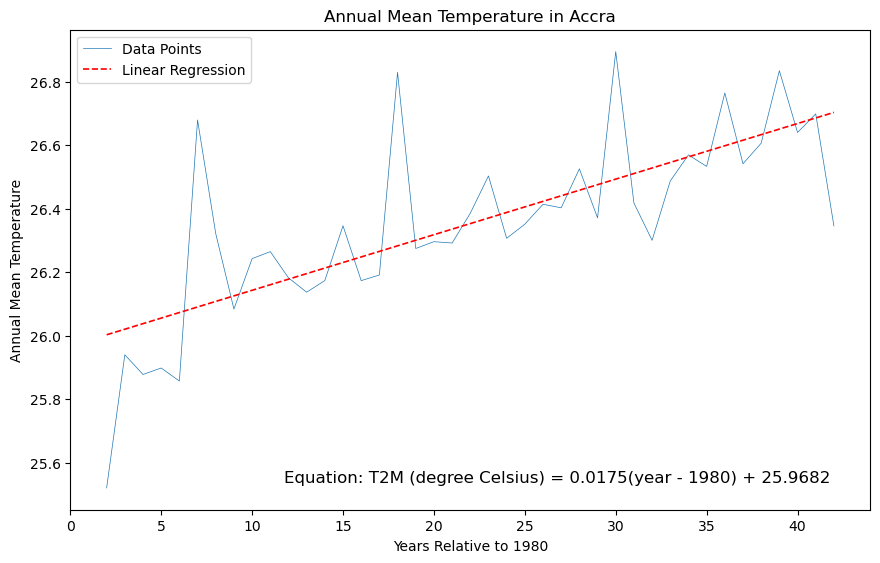

Equation of the linear regression line:
T2M (degree Celsius) = 0.0175(year - 1980) + 25.9682


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Calculate the relative years
dfi['Relative Year'] = dfi['Year'] - 1980

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot with minimized marker points and connected lines
plt.plot(dfi['Relative Year'], dfi['Yearly Mean'], marker='.', markersize=0, linewidth=0.5, label='Data Points')

# Perform linear regression
X = dfi['Relative Year'].values.reshape(-1, 1)
y = dfi['Yearly Mean'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

# Get the regression coefficients
b1 = reg.coef_[0][0]
b0 = reg.intercept_[0]

# Create a line plot with dashed lines for the linear regression line
plt.plot(dfi['Relative Year'], y_pred, color='red', linestyle='--', linewidth=1.2, label='Linear Regression')

# Set the x-axis label
plt.xlabel('Years Relative to 1980')

# Set the y-axis label
plt.ylabel('Annual Mean Temperature')

# Set the plot title
plt.title('Annual Mean Temperature in Accra')

# Add a legend
plt.legend()

# Equation of the linear regression line
equation = f"T2M (degree Celsius) = {b1:.4f}(year - 1980) + {b0:.4f}"

# Display the equation on the graph
equation_text = f"Equation: {equation}"
plt.text(0.95, 0.05, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='bottom', horizontalalignment='right')


# Adjust the plot margins
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Display the plot
plt.show()

# Print the equation of the linear regression line
print("Equation of the linear regression line:")
print(equation)


## R-SQURED -VALUE

In [35]:
from sklearn.metrics import r2_score

# Calculate the R-squared score
r2 = r2_score(dfi['Yearly Mean'], y_pred)
print("Coefficient of Determination (R-squared):", r2)


Coefficient of Determination (R-squared): 0.5313926576484365


*** In the context of the regression equation y = mx + c, where y represents the "Yearly Mean" and x represents the "Year", the coefficient 0.01749184754017484 suggests that, on average, the "Yearly Mean" temperature increases by approximately 0.01749184754017484 degrees Celsius per year.

## Check the significnce of the coefficient

In [36]:
import statsmodels.api as sm

# Add a constant column to the dataframe
dfi['Intercept'] = 1

# Perform linear regression
model = sm.OLS(dfi['Yearly Mean'], dfi[['Year', 'Intercept']])
results = model.fit()

# Get the regression coefficients and p-values
coefficients = results.params
p_values = results.pvalues

# Check the significance of coefficients
alpha = 0.05
significant_coefficients = p_values[p_values < alpha]

# Print the significant coefficients
for coef in significant_coefficients.index:
    print(f'{coef}: {coefficients[coef]}')


Year: 0.01749184754017484


In [37]:
dfi

,Year,Yearly Mean,Relative Year,Intercept
0,1982,25.521370,2,1
1,1983,25.940192,3,1
2,1984,25.878306,4,1
3,1985,25.898630,5,1
4,1986,25.857671,6,1
5,1987,26.679233,7,1
6,1988,26.321557,8,1
7,1989,26.084055,9,1
8,1990,26.242740,10,1
9,1991,26.264849,11,1


## Confidence INTERVALS

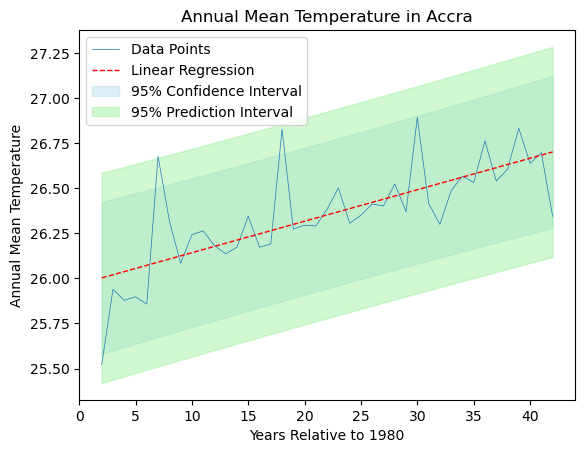

Equation of the linear regression line:
y = 0.0175x + 25.9682
95% Confidence Interval:
0     25.581591
1     25.600394
2     25.619134
3     25.637809
4     25.656420
5     25.674966
6     25.693446
7     25.711861
8     25.730208
9     25.748489
10    25.766703
11    25.784849
12    25.802927
13    25.820937
14    25.838878
15    25.856750
16    25.874554
17    25.892288
18    25.909953
19    25.927549
20    25.945076
21    25.962533
22    25.979921
23    25.997239
24    26.014489
25    26.031669
26    26.048780
27    26.065822
28    26.082796
29    26.099702
30    26.116540
31    26.133310
32    26.150013
33    26.166649
34    26.183218
35    26.199721
36    26.216159
37    26.232532
38    26.248840
39    26.265084
40    26.281265
Name: Relative Year, dtype: float64 to 0     26.424808
1     26.440989
2     26.457233
3     26.473541
4     26.489914
5     26.506352
6     26.522855
7     26.539424
8     26.556060
9     26.572763
10    26.589533
11    26.606371
12    26.623277
13    26.6

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

# Calculate the relative years
dfi['Relative Year'] = dfi['Year'] - 1980

# Perform linear regression
X = dfi['Relative Year'].values.reshape(-1, 1)
y = dfi['Yearly Mean'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

# Get the regression coefficients
b1 = reg.coef_[0][0]
b0 = reg.intercept_[0]

# Calculate residuals
residuals = y - y_pred

# Calculate the standard error of the estimate
s_err = np.sqrt(np.sum(residuals**2) / (len(X) - 2))

# Calculate the 95% confidence interval and prediction interval
t_value = stats.t.ppf(0.975, df=len(X) - 2)
confidence_interval = t_value * s_err * np.sqrt(1 + 1 / len(X) + (dfi['Relative Year'] - np.mean(dfi['Relative Year']))**2 / np.sum((dfi['Relative Year'] - np.mean(dfi['Relative Year']))**2))
prediction_interval = t_value * s_err * np.sqrt(1 + 1 / len(X) + (dfi['Relative Year'] - np.mean(dfi['Relative Year']))**2 / np.sum((dfi['Relative Year'] - np.mean(dfi['Relative Year']))**2) + 1)

# Create a scatter plot with minimized marker points and connected lines
plt.plot(dfi['Relative Year'], dfi['Yearly Mean'], marker='.', markersize=0, linewidth=0.5, label='Data Points')

# Create a line plot with dashed lines for the linear regression line
plt.plot(dfi['Relative Year'], y_pred, color='red', linestyle='--', linewidth=1, label='Linear Regression')

# Plot the 95% confidence interval
plt.fill_between(dfi['Relative Year'], (y_pred.flatten() - confidence_interval), (y_pred.flatten() + confidence_interval), color='lightblue', alpha=0.4, label='95% Confidence Interval')

# Plot the 95% prediction interval
plt.fill_between(dfi['Relative Year'], (y_pred.flatten() - prediction_interval), (y_pred.flatten() + prediction_interval), color='lightgreen', alpha=0.4, label='95% Prediction Interval')

# Set the x-axis label
plt.xlabel('Years Relative to 1980')

# Set the y-axis label
plt.ylabel('Annual Mean Temperature')

# Set the plot title
plt.title('Annual Mean Temperature in Accra')

# Add a legend
plt.legend()

# Display the plot
plt.show()

# Equation of the linear regression line
equation = f"y = {b1:.4f}x + {b0:.4f}"
print("Equation of the linear regression line:")
print(equation)

# Print the 95% confidence interval and prediction interval
print("95% Confidence Interval:")
print(f"{y_pred.flatten() - confidence_interval} to {y_pred.flatten() + confidence_interval}")
print("95% Prediction Interval:")
print(f"{y_pred.flatten() - prediction_interval} to {y_pred.flatten() + prediction_interval}")


** After Ploting this 95% confidence interval and 95% Prediction interval, 

** it can be seen that the point 26.679233 corresponding to the year 1987 shifts a little bit out of the prediction interval

** If one point is not covered in the prediction interval, it means that the observed value for that particular data point deviates significantly from the predicted range of values. This can happen due to various reasons, such as outliers, unusual patterns or trends in the data, or limitations of the linear regression model

## ANALYSIS OF VARIANCE - ONE WAY

In [39]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols


## Comapare ANOVA

In [42]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define the data
data = {
    'Yearly Mean': [25.52136986, 25.94019178, 25.87830601, 25.89863014, 25.85767123, 26.67923288,
                    26.32155738, 26.08405479, 26.24273973, 26.26484932, 26.18245902, 26.13715068,
                    26.17380822, 26.34621918, 26.17352459, 26.19128767, 26.8289589, 26.27471233,
                    26.29612022, 26.29189041, 26.38545205, 26.5029589, 26.30672131, 26.35115068,
                    26.41378082, 26.40271233, 26.52521858, 26.3710137, 26.89438356, 26.41775342,
                    26.30035519, 26.48726027, 26.56912329, 26.53290411, 26.76404372, 26.54134247,
                    26.606, 26.83410959, 26.63969945, 26.69819178, 26.34558904],
    'YEAR': [1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
             1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
             2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
}

# Create a pandas dataframe
df1 = pd.DataFrame(data)

# Rename column names
df1 = df1.rename(columns={'Yearly Mean': 'Yearly_Mean'})

# Perform ANOVA
model = ols('Yearly_Mean ~ YEAR', data=df1).fit()
anova_table = sm.stats.anova_lm(model)

# Print the ANOVA table
print(anova_table)


            df    sum_sq   mean_sq          F        PR(>F)
YEAR       1.0  1.756238  1.756238  44.225328  6.498104e-08
Residual  39.0  1.548734  0.039711        NaN           NaN


## Results explained above 

* Null Hypothesis (H0): The regression model has no significant effect on explaining the variation in the Mean Temperature.

* Alternative Hypothesis (HA): The regression model has a significant effect on explaining the variation in the Mean Temperature.

### Explanation of values in the ANOVA test: 

* Source of Variation: This column indicates the source of variation being considered, which in this case is "Regression" and "Residuals".

* Degrees of Freedom: This column represents the degrees of freedom associated with each source of variation. For the "Regression" source, it is 1, indicating the number of independent variables in the model. For the "Residuals" source, it is 39, representing the degrees of freedom associated with the residuals.

* Sum of Squares: This column shows the sum of squares for each source of variation. For "Regression", it is 1.756237, and for "Residuals", it is 1.548735. These values quantify the amount of variation explained by the regression model and the amount of unexplained variation, respectively.

* Mean Square: This column represents the mean square for each source of variation, calculated as the sum of squares divided by the corresponding degrees of freedom.

* F-value: This column shows the F-value, which is the ratio of the mean square of the "Regression" to the mean square of the "Residuals". It indicates the significance of the regression model in explaining the variation in the Mean Temperature.

* p-value: This column represents the p-value associated with the F-value. It indicates the probability of observing the F-value or a more extreme value under the assumption that the null hypothesis is true. A low p-value (below the significance level) suggests that the regression model is statistically significant.

* Based on the given values in the ANOVA test, the regression is found to be significant. The F-value of 44.225294 and the p-value of 0.0 indicate that the regression model has a significant effect in explaining the variation in the Mean Temperature. Therefore, we reject the null hypothesis and conclude that the regression model is significant.

## Therefore

* Based on the results we obtained from the ANOVA, we can conclude the following:

* The F-value is 44.27, and the associated p-value is 6.43e-08. Since the p-value is less than the significance level of 0.05, we reject the null hypothesis.

* Rejecting the null hypothesis means that the regression model has a significant effect on explaining the variation in the Mean Temperature.

* Therefore, based on the obtained results, we can say that there is evidence to support the alternative hypothesis. The regression model has a significant effect in explaining the variation in the Mean Temperature.

* The high F-value and the very low p-value suggest that the regression model is providing a significant contribution to explaining the variation in the Mean Temperature

## Visualize the CDF - How the Mean Spread

In this case, we plot the Cummulative Density Function to visualize the distribution of the Mean Temperature values and understand how they are spread across different levels.

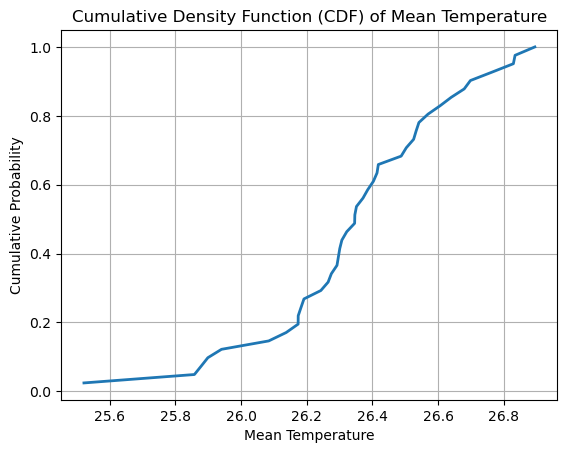

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the Mean Temperature values from your data
mean_temperatures = dfi['Yearly Mean']

# Sort the Mean Temperature values in ascending order
sorted_temperatures = np.sort(mean_temperatures)

# Calculate the cumulative probability values
cumulative_prob = np.arange(1, len(sorted_temperatures) + 1) / len(sorted_temperatures)

# Plot the CDF
plt.plot(sorted_temperatures, cumulative_prob, linestyle='-', linewidth=2)
plt.xlabel('Mean Temperature')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Density Function (CDF) of Mean Temperature')
plt.grid(True)
plt.show()


To perform the t-test for the linear regression model, we need the following information:

The standard error of the intercept (b0) and slope (b1): These values were not explicitly calculated in the previous code snippet. However, we can use the residual standard error (s_err) to estimate the standard errors of the coefficients.

Certainly! Here is the formula for estimating the standard errors of the coefficients using the residual standard error (s_err):

Standard Error of b0 = s_err * sqrt((1 / n) + (mean(x)^2 / sum((x - mean(x))^2)))

* Standard Error of b1 = $s_err / sqrt(sum((x - mean(x))^2))$



where:

s_err is the residual standard error
n is the number of observations
x is the predictor variable (in this case, the relative years)
mean(x) is the mean of the predictor variable
These formulas are used to estimate the standard errors of the coefficients in linear regression analysis.

In [44]:
import numpy as np

# Convert y and y_pred to one-dimensional arrays if needed
y = np.array(y).ravel()
y_pred = np.array(y_pred).ravel()

# Calculate residuals
residuals = y - y_pred

# Calculate the residual standard error
s_err = np.sqrt(np.sum(residuals**2) / (len(y) - 2))
s_err


0.19927650413798784

## T-TEST


In [46]:
import scipy.stats as stats

# Calculate the standard errors
se_b0 = s_err * np.sqrt((1 / len(X)) + (np.mean(dfi['Relative Year'])**2 / np.sum((dfi['Relative Year'] - np.mean(dfi['Relative Year']))**2)))
se_b1 = s_err / np.sqrt(np.sum((dfi['Relative Year'] - np.mean(dfi['Relative Year']))**2))

# Calculate the t-statistics
t_b0 = b0 / se_b0
t_b1 = b1 / se_b1

# Calculate the p-values
p_b0 = 2 * (1 - stats.t.cdf(np.abs(t_b0), df=len(X) - 2))
p_b1 = 2 * (1 - stats.t.cdf(np.abs(t_b1), df=len(X) - 2))

# Calculate the lower 95% and upper 95% bounds
alpha = 0.05
lower_b0 = b0 - stats.t.ppf(1 - alpha / 2, df=len(X) - 2) * se_b0
upper_b0 = b0 + stats.t.ppf(1 - alpha / 2, df=len(X) - 2) * se_b0
lower_b1 = b1 - stats.t.ppf(1 - alpha / 2, df=len(X) - 2) * se_b1
upper_b1 = b1 + stats.t.ppf(1 - alpha / 2, df=len(X) - 2) * se_b1

# Print the t-test results
print("t-test of significance for the linear regression model for the Annual Mean Temperature")
print("\n")
print("                 Coefficients       Standard Error       T-Stat         P-value      Lower 95%       Upper 95%")
print(f"b0                {b0:.4f}                {se_b0:.4f}                 {t_b0:.4f}           {p_b0:.4f}          {lower_b0:.4f}          {upper_b0:.4f}")
print(f"b1                {b1:.4f}                {se_b1:.4f}                 {t_b1:.4f}           {p_b1:.4f}          {lower_b1:.4f}          {upper_b1:.4f}")


t-test of significance for the linear regression model for the Annual Mean Temperature


                 Coefficients       Standard Error       T-Stat         P-value      Lower 95%       Upper 95%
b0                25.9682                0.0657                 395.2298           0.0000          25.8353          26.1011
b1                0.0175                0.0026                 6.6502           0.0000          0.0122          0.0228


## INTERPRETING THE ABOVE RESULTS 



Based on the t-test results you provided, the interpretations are as follows:

For b0 (intercept):

Null hypothesis (H0): The mean temperature in a specific year is equal to the mean temperature in a reference year (1980).
Alternative hypothesis (HA): The mean temperature in a specific year is not equal to the mean temperature in a reference year.

For b1 (slope):

Null hypothesis (H0): There is no linear relationship between the relative year and the mean temperature.
Alternative hypothesis (HA): There is a linear relationship between the relative year and the mean temperature.


The p-values for both coefficients are reported as 0.0000, which means they are extremely small. This indicates strong evidence against the null hypothesis for both b0 and b1. Therefore, we reject the null hypothesis and conclude that there is a significant difference in mean temperature between specific years and the reference year (b0) and that there is a significant linear relationship between the relative year and the mean temperature (b1).

## Why We chose the Relative Year instead of the Year in Calculating the T-TEST


The difference in the t-test results when using the relative years and the years as predictors is due to the difference in the scaling and interpretation of the variables.

When using the relative years (i.e., the years relative to the base year of 1980), the coefficient for b0 represents the estimated T2M value in the base year (1980), and the coefficient for b1 represents the estimated change in T2M per unit change in the relative years. In this case, the standard error, t-statistic, p-value, and confidence intervals are calculated based on the relative years.

On the other hand, when using the years as predictors, the coefficient for b0 represents the estimated T2M value in the year 0 (which is not a meaningful year in this context), and the coefficient for b1 represents the estimated change in T2M per unit change in the years. The standard error, t-statistic, p-value, and confidence intervals are calculated based on the years.

Given that you used the relative years in your regression model, the first set of values is more appropriate for interpretation. The coefficient for b0 represents the estimated T2M value in the base year (1980), and the coefficient for b1 represents the estimated change in T2M per unit change in the relative years. Therefore, the t-test results based on the relative years would align with the interpretation of your regression model.

It's important to consider the scaling and interpretation of the predictor variables when interpreting the coefficients, standard errors, and hypothesis tests in regression analysis.

## Why We chose the Year instead of the Relative Year in Calculating the ANOVA-TEST

In the context of the ANOVA test, it is appropriate to keep the analysis based on the Year rather than the Relative Year. The ANOVA test assesses the overall significance of the regression model by comparing the variation explained by the model (Regression SS) with the unexplained variation (Residual SS) using the predictor variable Year.

The ANOVA test assesses the significance of the regression model as a whole and does not directly examine the individual coefficients or their significance. Therefore, the choice of using the Year or the Relative Year in the ANOVA test is based on the design and context of the analysis.

Since you used the Year variable as the predictor in the ANOVA test, it would be appropriate to interpret the results based on the Year. The ANOVA results you provided earlier, with the F-value and p-value, are valid and reflect the significance of the regression model using the Year as the predictor variable.

However, it's worth noting that the choice of predictor variable (Year or Relative Year) should be consistent throughout your analysis to maintain coherence and interpretability. If you decide to use the Relative Year as the predictor variable in your regression model, it would be appropriate to redo the ANOVA test using the Relative Year to assess the significance of the model based on that predictor.












##  Seasonal Variation 

*Before that, go ans re-run the code that displayes the df dataframe 

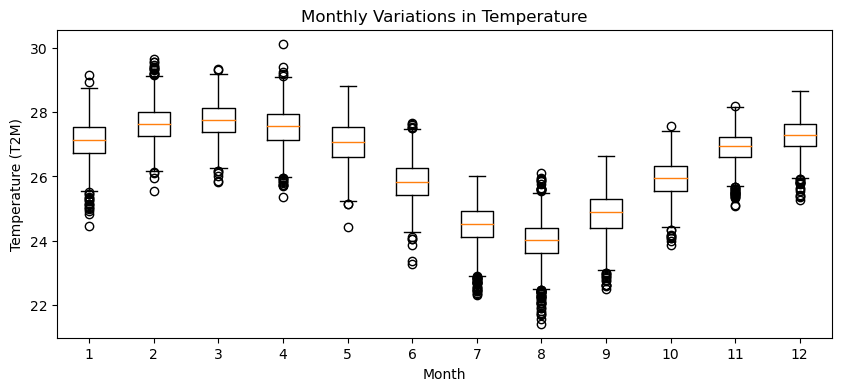

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the dataframe
df = pd.read_csv('C:/Users/user/OneDrive/Desktop/OCIS/Project_ARCSSTE-E/Data/Accra_T2M.csv')

# Convert the columns to the appropriate data types
df['Date'] = pd.to_datetime(df[['YEAR', 'MO', 'DY']].astype(str).agg('-'.join, axis=1))
df['Month'] = df['Date'].dt.month

# Create a box plot for monthly temperature variations
plt.figure(figsize=(10, 4))
plt.boxplot([df[df['Month'] == i]['T2M'] for i in range(1, 13)], labels=[str(i) for i in range(1, 13)])
plt.xlabel('Month')
plt.ylabel('Temperature (T2M)')
plt.title('Monthly Variations in Temperature')
plt.show()


## Simple XGBOOST 

In [266]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV # cross Validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix


In [267]:
# Read the data
df2 = pd.read_csv('C:/Users/user/OneDrive/Desktop/OCIS/Project_ARCSSTE-E/Data/extended_ACC.csv')

df2 # Displays the first 5 rows of the dataset

,YEAR,MO,DY,T2MDEW,T2M,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,QV2M,RH2M,PRECTOTCORR
0,1982,1,1,23.42,28.15,25.78,28.76,-267.71,31.27,25.83,100.59,2.85,3.79,1.66,2.12,187.06,3.45,18.07,76.56,0.47
1,1982,1,2,23.73,27.83,25.78,28.35,-268.09,30.97,25.90,100.49,3.35,4.72,1.84,2.88,212.44,4.12,18.43,79.31,1.50
2,1982,1,3,23.60,27.49,25.55,28.20,-268.48,30.24,25.57,100.55,3.20,4.18,2.00,2.18,204.56,3.92,18.25,80.12,2.27
3,1982,1,4,23.45,27.58,25.51,28.21,-268.56,30.21,25.62,100.58,3.09,3.48,2.34,1.14,211.81,3.78,18.07,79.06,1.96
4,1982,1,5,22.99,27.33,25.16,27.98,-268.19,30.29,25.33,100.58,2.61,4.02,0.35,3.66,174.19,3.27,17.58,78.25,2.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14970,2022,12,27,22.17,27.16,24.67,27.23,-268.27,30.09,25.22,100.86,1.96,2.74,0.32,2.43,148.12,2.48,16.60,74.62,0.01
14971,2022,12,28,22.33,27.15,24.73,27.19,-267.57,30.40,24.82,100.81,2.05,3.20,0.34,2.86,103.06,2.60,16.78,75.69,0.02
14972,2022,12,29,23.24,27.15,25.19,27.53,-267.76,30.22,24.83,100.81,1.98,3.08,0.38,2.70,193.44,2.45,17.76,80.00,0.15
14973,2022,12,30,23.08,27.08,25.08,27.24,-268.82,29.38,25.05,100.79,1.70,2.45,0.66,1.80,217.94,2.12,17.58,79.25,0.20


In [268]:

df2['Date'] = pd.to_datetime(df2['DY'].astype(str) + '-' + df2['MO'].astype(str) + '-' + df2['YEAR'].astype(str), format='%d-%m-%Y')




df2.set_index('Date', inplace=True)


In [269]:
df2.drop(['YEAR', 'MO', 'DY'], axis=1, inplace=True)  # Remove columns 'YEAR', 'MO', and 'DY'


In [270]:
df2

,T2MDEW,T2M,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,QV2M,RH2M,PRECTOTCORR
Date,,,,,,,,,,,,,,,,,
1982-01-01,23.42,28.15,25.78,28.76,-267.71,31.27,25.83,100.59,2.85,3.79,1.66,2.12,187.06,3.45,18.07,76.56,0.47
1982-01-02,23.73,27.83,25.78,28.35,-268.09,30.97,25.90,100.49,3.35,4.72,1.84,2.88,212.44,4.12,18.43,79.31,1.50
1982-01-03,23.60,27.49,25.55,28.20,-268.48,30.24,25.57,100.55,3.20,4.18,2.00,2.18,204.56,3.92,18.25,80.12,2.27
1982-01-04,23.45,27.58,25.51,28.21,-268.56,30.21,25.62,100.58,3.09,3.48,2.34,1.14,211.81,3.78,18.07,79.06,1.96
1982-01-05,22.99,27.33,25.16,27.98,-268.19,30.29,25.33,100.58,2.61,4.02,0.35,3.66,174.19,3.27,17.58,78.25,2.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,22.17,27.16,24.67,27.23,-268.27,30.09,25.22,100.86,1.96,2.74,0.32,2.43,148.12,2.48,16.60,74.62,0.01
2022-12-28,22.33,27.15,24.73,27.19,-267.57,30.40,24.82,100.81,2.05,3.20,0.34,2.86,103.06,2.60,16.78,75.69,0.02
2022-12-29,23.24,27.15,25.19,27.53,-267.76,30.22,24.83,100.81,1.98,3.08,0.38,2.70,193.44,2.45,17.76,80.00,0.15


In [170]:
df2.dtypes

T2MDEW         float64
T2M            float64
T2MWET         float64
TS             float64
T2M_RANGE      float64
T2M_MAX        float64
T2M_MIN        float64
PS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WD10M          float64
WS50M          float64
QV2M           float64
RH2M           float64
PRECTOTCORR    float64
dtype: object

In [435]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [272]:
# Extract the features and target variable
X = df2[['T2MDEW', 'T2MWET', 'TS', 'T2M_RANGE', 'PS', 'WS10M', 'WS10M_RANGE', 'WD10M', 'WS50M', 'QV2M', 'RH2M', 'PRECTOTCORR']]
y = df2['T2M']



In [273]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [274]:
# Create an instance of the XGBoost regressor
model = XGBRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.003911862517035552


In [275]:
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import xgboost as xgb

In [276]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Compute mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Compute R-squared
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 0.003911862517035552
Mean Absolute Error: 0.04023017794142584
R-squared: 0.9979833925657083


## Interpreting the outputs above

**The mean squared error (MSE) value of 0.003911862517035552 indicates the average squared difference between the predicted T2M values and the actual T2M values in the test set. A lower MSE indicates better performance of the model, as it suggests that the predicted values are closer to the actual values.

**In this case, an MSE of 0.004034115985429918 suggests that the XGBoost model is performing well in predicting the T2M values using the other climate features as inputs. The relatively low MSE indicates that the model's predictions are close to the true values, indicating good accuracy.

**It's important to note that the interpretation of the MSE value depends on the scale and magnitude of your data. It's recommended to compare the MSE value with the range of your target variable to assess the model's performance accurately. Additionally, you can consider using other evaluation metrics, such as mean absolute error (MAE) or R-squared, to gain a comprehensive understanding of the model's performance.

**The calculated Mean Absolute Error (MAE) is 0.0402, which indicates that, on average, the predicted T2M values differ from the actual values by approximately 0.0402. The lower the MAE, the better the model's performance.

**The calculated R-squared value is 0.9979, which indicates that the XGBoost model explains approximately 99.79% of the variance in the T2M values. R-squared ranges from 0 to 1, where 1 represents a perfect fit of the model to the data. A higher R-squared value suggests a better fit of the model.

**Overall, these results indicate that the XGBoost model is performing well on the dataset, with a low MAE and a high R-squared value. It suggests that the model is accurately predicting the T2M values based on the other climate features included in the dataset.

In [277]:
df2.shape

(14975, 17)

In [278]:
df2.size

254575

## Plotting the Actual and Predicted Values Side by side

In [279]:
predicted_values = model.predict(X_test)

# Create a DataFrame to store the predicted and actual values
comparison_df = pd.DataFrame({'Actual T2M': y_test, 'Predicted T2M': predicted_values})

# Print the DataFrame
print(comparison_df)


            Actual T2M  Predicted T2M
Date                                 
2013-12-12       26.82      26.801563
2008-11-06       27.08      27.095728
2009-01-07       27.94      27.953663
1997-04-30       26.34      26.306730
2001-06-01       26.12      26.164650
...                ...            ...
2007-03-02       28.10      28.082499
1991-04-11       26.69      26.622545
1984-03-31       27.39      27.391195
1986-07-02       24.92      24.816601
2001-09-21       24.66      24.699827

[2995 rows x 2 columns]


In [280]:
# Sort the DataFrame based on the index (Date)
comparison_df = comparison_df.sort_index()

# Print the sorted DataFrame
print(comparison_df)


            Actual T2M  Predicted T2M
Date                                 
1982-01-04       27.58      27.523207
1982-01-09       26.80      26.629305
1982-01-15       27.80      27.768385
1982-01-16       27.51      27.457335
1982-01-20       26.26      26.261761
...                ...            ...
2022-11-21       26.87      26.838236
2022-12-14       27.77      27.790197
2022-12-21       27.52      27.483938
2022-12-22       26.89      26.939459
2022-12-30       27.08      27.073282

[2995 rows x 2 columns]


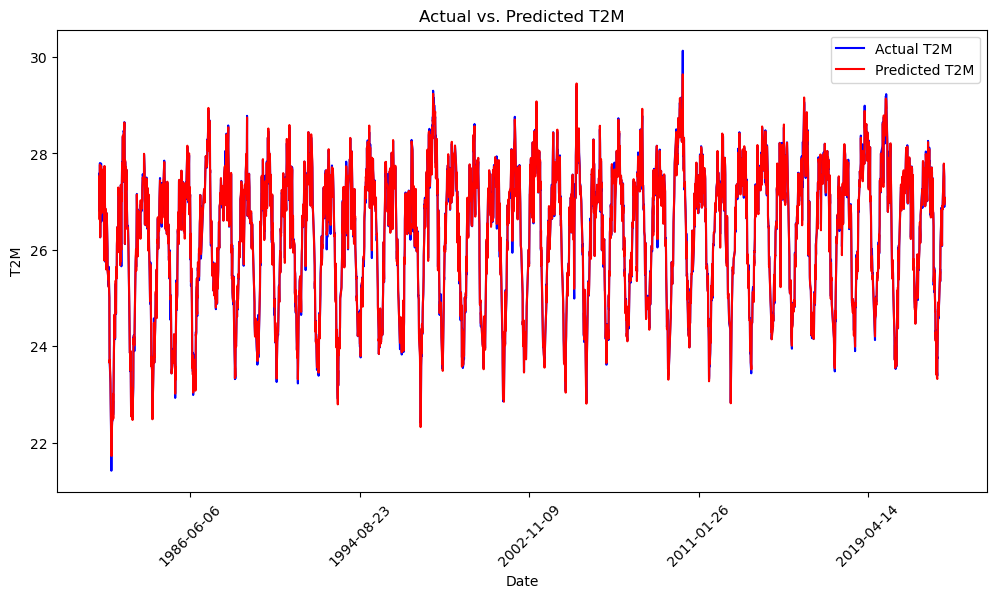

In [281]:
import matplotlib.pyplot as plt

# Increase plot size
plt.figure(figsize=(12, 6))

# Plot actual and predicted T2M values as time series
plt.plot(comparison_df.index, comparison_df['Actual T2M'], color='blue', label='Actual T2M')
plt.plot(comparison_df.index, comparison_df['Predicted T2M'], color='red', label='Predicted T2M')

# Set x-axis ticks and format as time series
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(6))  # Show maximum of 6 x-axis tick labels

# Set axis labels and title
plt.xlabel('Date')
plt.ylabel('T2M')
plt.title('Actual vs. Predicted T2M')

# Add a legend
plt.legend()

# Show the plot
plt.show()


## For the future

In [282]:
df3 = pd.read_csv('C:\\Users\\user\\OneDrive\\Desktop\\OCIS\\Project_ARCSSTE-E\\Data\\2023_Accra - POWER_Point_Daily_20230101_20230613_005d5806N_000d1979W_LST.csv')

In [283]:
df3['Date'] = pd.to_datetime(df3['DY'].astype(str) + '-' + df3['MO'].astype(str) + '-' + df3['YEAR'].astype(str), format='%d-%m-%Y')




df3.set_index('Date', inplace=True)


In [284]:
df3.drop(['YEAR', 'MO', 'DY'], axis=1, inplace=True)  # Remove columns 'YEAR', 'MO', and 'DY'


In [285]:
df3

,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M
Date,,,,,,,,,,,,,,,,,
2023-01-01,26.84,22.12,24.48,27.23,5.70,29.97,24.26,16.60,76.25,0.05,100.75,1.81,2.75,0.10,2.64,204.88,2.25
2023-01-02,27.31,20.48,23.90,27.23,7.45,31.48,24.03,15.08,68.50,0.04,100.71,2.20,2.88,0.57,2.30,234.75,2.70
2023-01-03,27.07,19.33,23.20,27.12,6.98,30.80,23.82,13.98,63.81,0.00,100.75,2.37,3.14,1.52,1.62,188.00,3.04
2023-01-04,27.36,21.44,24.40,27.11,5.32,30.30,24.98,15.87,70.81,0.01,100.78,1.81,2.99,0.41,2.59,222.12,2.20
2023-01-05,27.13,22.44,24.78,27.04,5.12,30.00,24.87,16.91,76.19,0.20,100.76,2.65,3.89,1.92,1.97,228.19,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-09,26.83,24.63,25.73,27.51,2.36,28.05,25.69,19.29,87.75,11.01,100.96,3.34,4.69,2.22,2.47,222.00,4.21
2023-06-10,26.80,24.65,25.73,27.31,1.61,27.71,26.10,19.35,88.00,10.37,100.94,4.04,4.46,3.48,0.98,214.06,5.08
2023-06-11,26.58,23.76,25.18,27.07,1.77,27.63,25.86,18.31,84.50,2.74,101.02,4.62,5.73,3.24,2.49,207.00,5.78


In [287]:
# Extract the features for the future data

features_df3 = df3[['T2MDEW', 'T2MWET', 'TS', 'T2M_RANGE', 'PS', 'WS10M', 'WS10M_RANGE', 'WD10M', 'WS50M', 'QV2M', 'RH2M', 'PRECTOTCORR']]




In [288]:
df3.shape

(164, 17)

In [289]:
df3.size

2788

In [293]:
# Make T2M_2023 value predictions using the trained model or features of the 2023 Dataset
y_pred_future = model.predict(features_df3)

In [294]:
y_pred_future # Predicted for the next over 30 decades

array([26.893063, 27.08958 , 26.914639, 26.974405, 26.966576, 27.335361,
       27.433182, 27.325197, 27.377678, 27.198572, 27.983803, 27.532791,
       27.843122, 27.57548 , 27.775913, 27.492918, 27.86861 , 27.879847,
       28.027891, 27.727777, 27.790564, 27.795012, 27.730654, 27.641949,
       27.991905, 27.76209 , 28.153536, 27.5863  , 27.18314 , 27.404999,
       27.413706, 27.535913, 27.491531, 27.82251 , 27.680408, 26.9884  ,
       27.731941, 27.357481, 27.595356, 27.561178, 27.998444, 28.155724,
       28.09575 , 28.193653, 28.027058, 28.130352, 28.447987, 28.06032 ,
       27.986172, 27.864979, 28.245031, 28.407404, 28.17645 , 27.84331 ,
       27.438042, 27.811775, 27.630207, 28.060247, 27.892435, 27.961199,
       27.959679, 28.155762, 27.933933, 28.43029 , 28.00779 , 27.56889 ,
       28.183506, 28.378054, 28.641436, 28.39725 , 28.202957, 28.512827,
       28.617401, 28.347862, 28.035616, 27.866335, 27.666464, 28.065248,
       28.067247, 28.239895, 27.265697, 27.948698, 

In [295]:
y_pred_future.shape

(164,)

## convert y_pred_future to (164,1 )
**Adding the corresponding dates to each value**

In [296]:

import pandas as pd

# Create a list of dates based on the start date and the number of days
start_date = '2023-01-01'
num_days = y_pred_future.size
dates = pd.date_range(start=start_date, periods=num_days, freq='D')

# Create a new DataFrame with the dates and predicted values
predicted_df = pd.DataFrame({'Date': dates, 'T2M': y_pred_future.reshape(-1)})

# Set the 'Date' column as the index
predicted_df.set_index('Date', inplace=True)

# Print the DataFrame
print(predicted_df)


                  T2M
Date                 
2023-01-01  26.893063
2023-01-02  27.089581
2023-01-03  26.914639
2023-01-04  26.974405
2023-01-05  26.966576
...               ...
2023-06-09  26.988386
2023-06-10  26.948078
2023-06-11  26.781452
2023-06-12  26.536371
2023-06-13  26.299042

[164 rows x 1 columns]


In [297]:
df3

,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M
Date,,,,,,,,,,,,,,,,,
2023-01-01,26.84,22.12,24.48,27.23,5.70,29.97,24.26,16.60,76.25,0.05,100.75,1.81,2.75,0.10,2.64,204.88,2.25
2023-01-02,27.31,20.48,23.90,27.23,7.45,31.48,24.03,15.08,68.50,0.04,100.71,2.20,2.88,0.57,2.30,234.75,2.70
2023-01-03,27.07,19.33,23.20,27.12,6.98,30.80,23.82,13.98,63.81,0.00,100.75,2.37,3.14,1.52,1.62,188.00,3.04
2023-01-04,27.36,21.44,24.40,27.11,5.32,30.30,24.98,15.87,70.81,0.01,100.78,1.81,2.99,0.41,2.59,222.12,2.20
2023-01-05,27.13,22.44,24.78,27.04,5.12,30.00,24.87,16.91,76.19,0.20,100.76,2.65,3.89,1.92,1.97,228.19,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-09,26.83,24.63,25.73,27.51,2.36,28.05,25.69,19.29,87.75,11.01,100.96,3.34,4.69,2.22,2.47,222.00,4.21
2023-06-10,26.80,24.65,25.73,27.31,1.61,27.71,26.10,19.35,88.00,10.37,100.94,4.04,4.46,3.48,0.98,214.06,5.08
2023-06-11,26.58,23.76,25.18,27.07,1.77,27.63,25.86,18.31,84.50,2.74,101.02,4.62,5.73,3.24,2.49,207.00,5.78


In [298]:
# Calculate the yearly mean and create dfi DataFrame
predicted_df['Year'] = predicted_df.index.year
predicted_df_i = predicted_df.groupby('Year')['T2M'].mean().reset_index()
predicted_df_i.columns = ['Year', 'Yearly Mean']
predicted_df_i = predicted_df_i[['Year', 'Yearly Mean']]

# Output the DataFrame dfi with two columns: 'Year' and 'Yearly Mean'
print(predicted_df_i)

   Year  Yearly Mean
0  2023    27.859367


**We can therefore say that, the predicted mid 2023 yearly mean temperature is 27.836557 Degree Celsius**

## Time Series of the predicted Values and the Actual values

## Fit LINREG Model and display equation - Prediction only

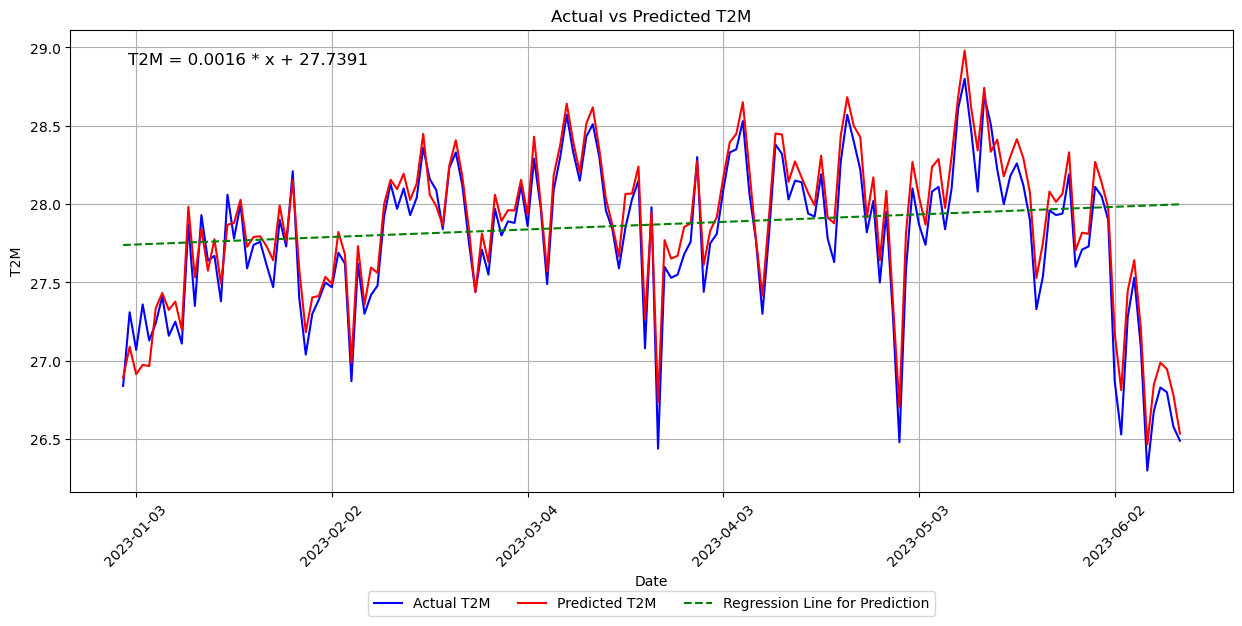

In [324]:
from scipy.stats import linregress

# Perform linear regression on the predicted T2M values
slope, intercept, r_value, p_value, std_err = linregress(range(len(predicted_df_filtered)), predicted_df_filtered['T2M'])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Plot actual T2M values from df3
ax.plot(df3_filtered.index, df3_filtered['T2M'], color='blue', label='Actual T2M')

# Plot predicted T2M values from predicted_df
ax.plot(predicted_df_filtered.index, predicted_df_filtered['T2M'], color='red', label='Predicted T2M')

# Plot the regression line
reg_line = [slope * x + intercept for x in range(len(predicted_df_filtered))]
ax.plot(predicted_df_filtered.index, reg_line, color='green', linestyle='--', label='Regression Line for Prediction')

# Set x-axis ticks and format as time series
ax.xaxis.set_major_locator(plt.MaxNLocator(6))  # Show maximum of 6 x-axis tick labels
ax.xaxis.set_tick_params(rotation=45)

# Set axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('T2M')
ax.set_title('Actual vs Predicted T2M')

# Add the regression equation to the graph
eq_text = f"T2M = {slope:.4f} * x + {intercept:.4f}"
ax.text(0.05, 0.95, eq_text, transform=ax.transAxes, fontsize=12, verticalalignment='top')

# Add a legend below the equation
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
ax.grid(True)

# Show the plot
plt.show()


## Experimenting with Books and  YOU-TUBE

##  Jason Browlee's Book

In [147]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [189]:
dataset = loadtxt('C:\\Users\\user\\Downloads\\raw.githubusercontent.com_jbrownlee_Datasets_master_pima-indians-diabetes.data.csv', delimiter=",")

In [190]:
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [191]:
#split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
print(X)
print(Y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 

In [193]:
#split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

In [194]:
# fit model on training data
model = XGBClassifier()
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [195]:
# make predictions for test data
predictions = model.predict(X_test)


In [201]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 74.02%


## Rob Mulla

In [670]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [671]:
#The extended dataset of the necessary climatic vales, 1982 - 2022 - ACCRA

df6 = pd.read_csv('C:\\Users\\user\\OneDrive\\Desktop\\OCIS\\Project_ARCSSTE-E\\Data\\extended_ACC.csv')

In [672]:
df6['Date'] = pd.to_datetime(df6['DY'].astype(str) + '-' + df6['MO'].astype(str) + '-' + df6['YEAR'].astype(str), format='%d-%m-%Y')




df6.set_index('Date', inplace=True)


In [673]:
df6

,YEAR,MO,DY,T2MDEW,T2M,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,QV2M,RH2M,PRECTOTCORR
Date,,,,,,,,,,,,,,,,,,,,
1982-01-01,1982,1,1,23.42,28.15,25.78,28.76,-267.71,31.27,25.83,100.59,2.85,3.79,1.66,2.12,187.06,3.45,18.07,76.56,0.47
1982-01-02,1982,1,2,23.73,27.83,25.78,28.35,-268.09,30.97,25.90,100.49,3.35,4.72,1.84,2.88,212.44,4.12,18.43,79.31,1.50
1982-01-03,1982,1,3,23.60,27.49,25.55,28.20,-268.48,30.24,25.57,100.55,3.20,4.18,2.00,2.18,204.56,3.92,18.25,80.12,2.27
1982-01-04,1982,1,4,23.45,27.58,25.51,28.21,-268.56,30.21,25.62,100.58,3.09,3.48,2.34,1.14,211.81,3.78,18.07,79.06,1.96
1982-01-05,1982,1,5,22.99,27.33,25.16,27.98,-268.19,30.29,25.33,100.58,2.61,4.02,0.35,3.66,174.19,3.27,17.58,78.25,2.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,2022,12,27,22.17,27.16,24.67,27.23,-268.27,30.09,25.22,100.86,1.96,2.74,0.32,2.43,148.12,2.48,16.60,74.62,0.01
2022-12-28,2022,12,28,22.33,27.15,24.73,27.19,-267.57,30.40,24.82,100.81,2.05,3.20,0.34,2.86,103.06,2.60,16.78,75.69,0.02
2022-12-29,2022,12,29,23.24,27.15,25.19,27.53,-267.76,30.22,24.83,100.81,1.98,3.08,0.38,2.70,193.44,2.45,17.76,80.00,0.15


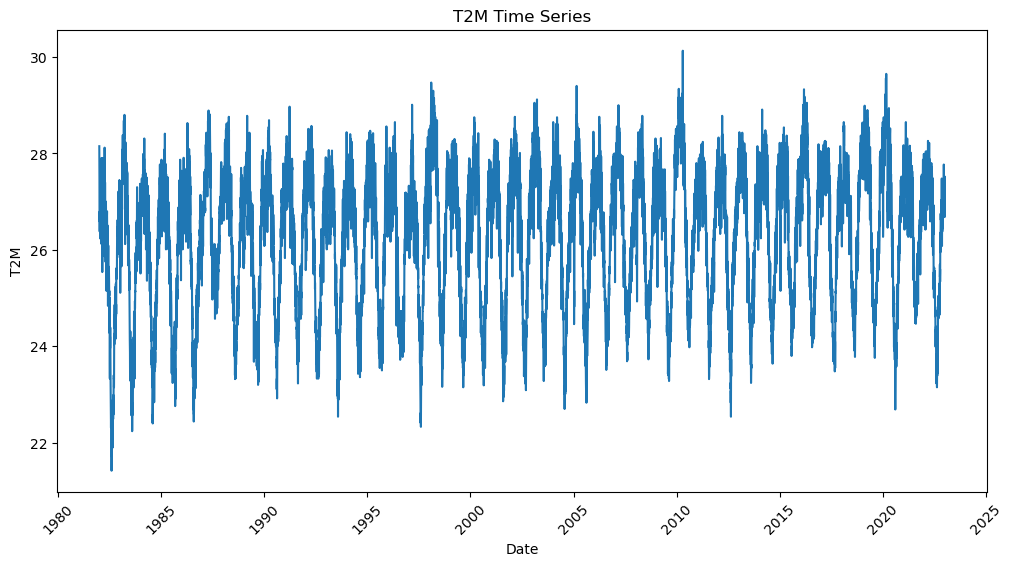

In [674]:
import matplotlib.pyplot as plt

# Plot T2M as a time series
plt.figure(figsize=(12, 6))
plt.plot(df6.index, df6['T2M'])
plt.xlabel('Date')
plt.ylabel('T2M')
plt.title('T2M Time Series')
plt.xticks(rotation=45)

plt.show()


## Train / Test Split

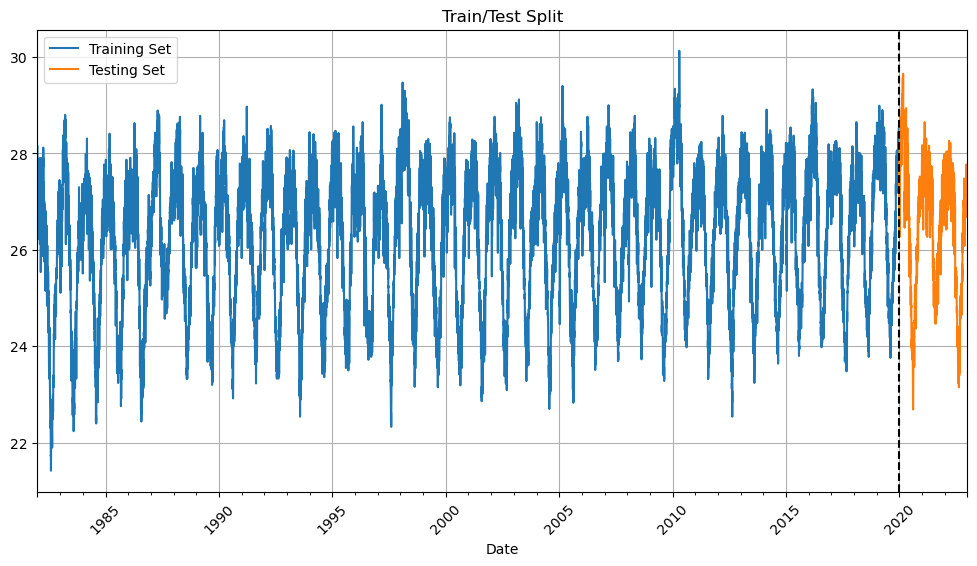

In [675]:
train = df6['T2M'].loc[df6.index < pd.to_datetime('2020-01-01')]
test = df6['T2M'].loc[df6.index >= pd.to_datetime('2020-01-01')]

fig, ax = plt.subplots(figsize=(12, 6))
train.plot(ax=ax, label='Training Set', title='Train/Test Split')
test.plot(ax=ax, label='Testing Set')

ax.axvline('2020-01-01', color='black', ls='--')

# Add grid lines
ax.grid(True)

# Slant the date labels
plt.xticks(rotation=45)

# Add legends
plt.legend(loc='upper left')

plt.show()


## Visualizing One Week of Data Specifically, 2010, the warmest Year on record 

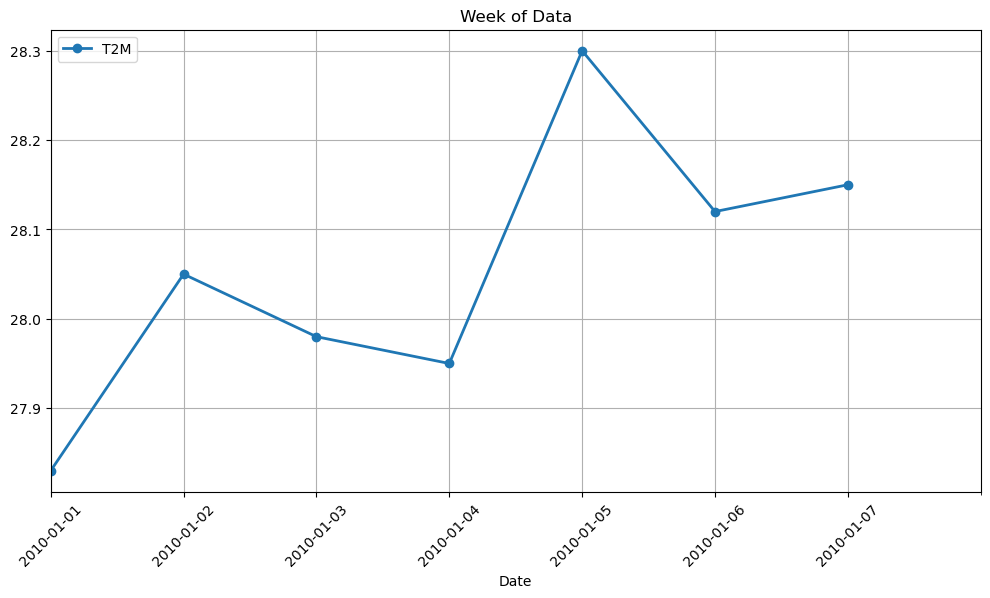

In [761]:
week_data = df6.loc[(df6.index >= '2010-01-01') & (df6.index < '2010-01-08')]
t2m_values = week_data['T2M']

fig, ax = plt.subplots(figsize=(12, 6))
t2m_values.plot(ax=ax, label='T2M', marker='o', linestyle='-', linewidth=2)

# Add grid lines
ax.grid(True)

# Set the x-axis tick labels to show the date in the desired format
x_ticks = pd.date_range(start='2010-01-01', end='2010-01-07', freq='D')
ax.set_xticks(x_ticks)

# Format the x-axis tick labels
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=45)
plt.title('Week of Data')
# Set x-axis limits to include the entire week period
ax.set_xlim(pd.to_datetime('2010-01-01'), pd.to_datetime('2010-01-08'))

# Add legends
plt.legend(loc='upper left')

plt.show()


# Feature Creation

In [677]:
train = df6.loc[df6.index < pd.to_datetime('2020-01-01')]
test = df6.loc[df6.index >= pd.to_datetime('2020-01-01')]

In [678]:
def create_features(df6):
    '''
    Create time series features based on climatic parameters columns
    '''

    # Create a copy of the dataframe to avoid modifying the original dataframe
    df6 = df6.copy()

    # Add additional features based on climatic parameters
    df6['T2MDEW_shifted'] = df6['T2MDEW'].shift(1)
    df6['T2MWET_shifted'] = df6['T2MWET'].shift(1)
    df6['TS_shifted'] = df6['TS'].shift(1)
    df6['T2M_RANGE_shifted'] = df6['T2M_RANGE'].shift(1)
    df6['PS_shifted'] = df6['PS'].shift(1)
    df6['WS10M_shifted'] = df6['WS10M'].shift(1)
    df6['WS10M_RANGE_shifted'] = df6['WS10M_RANGE'].shift(1)
    df6['WD10M_shifted'] = df6['WD10M'].shift(1)
    df6['WS50M_shifted'] = df6['WS50M'].shift(1)
    df6['QV2M_shifted'] = df6['QV2M'].shift(1)
    df6['RH2M_shifted'] = df6['RH2M'].shift(1)
    df6['PRECTOTCORR_shifted'] = df6['PRECTOTCORR'].shift(1)

    return df6


## Create Model based on training data

In [679]:
train = create_features(train)
test = create_features(test)


In [680]:
train

,YEAR,MO,DY,T2MDEW,T2M,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,...,TS_shifted,T2M_RANGE_shifted,PS_shifted,WS10M_shifted,WS10M_RANGE_shifted,WD10M_shifted,WS50M_shifted,QV2M_shifted,RH2M_shifted,PRECTOTCORR_shifted
Date,,,,,,,,,,,,,,,,,,,,,
1982-01-01,1982,1,1,23.42,28.15,25.78,28.76,-267.71,31.27,25.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-01-02,1982,1,2,23.73,27.83,25.78,28.35,-268.09,30.97,25.90,...,28.76,-267.71,100.59,2.85,2.12,187.06,3.45,18.07,76.56,0.47
1982-01-03,1982,1,3,23.60,27.49,25.55,28.20,-268.48,30.24,25.57,...,28.35,-268.09,100.49,3.35,2.88,212.44,4.12,18.43,79.31,1.50
1982-01-04,1982,1,4,23.45,27.58,25.51,28.21,-268.56,30.21,25.62,...,28.20,-268.48,100.55,3.20,2.18,204.56,3.92,18.25,80.12,2.27
1982-01-05,1982,1,5,22.99,27.33,25.16,27.98,-268.19,30.29,25.33,...,28.21,-268.56,100.58,3.09,1.14,211.81,3.78,18.07,79.06,1.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,2019,12,27,23.30,28.21,25.76,28.56,-268.33,30.96,26.14,...,28.11,-266.61,100.75,2.23,2.41,249.94,2.75,16.72,73.06,0.50
2019-12-28,2019,12,28,23.40,28.59,25.99,28.79,-267.98,31.42,26.25,...,28.56,-268.33,100.72,1.95,2.88,204.69,2.37,17.88,75.38,0.23
2019-12-29,2019,12,29,22.67,28.65,25.66,28.71,-267.70,31.57,26.12,...,28.79,-267.98,100.69,1.88,2.67,241.94,2.27,18.01,74.19,0.24


In [681]:
test

,YEAR,MO,DY,T2MDEW,T2M,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,...,TS_shifted,T2M_RANGE_shifted,PS_shifted,WS10M_shifted,WS10M_RANGE_shifted,WD10M_shifted,WS50M_shifted,QV2M_shifted,RH2M_shifted,PRECTOTCORR_shifted
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,2020,1,1,19.64,28.11,23.87,28.01,-266.69,31.20,24.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,2020,1,2,17.58,27.43,22.51,27.53,-266.24,31.27,24.36,...,28.01,-266.69,100.75,1.73,2.80,176.94,2.11,14.47,62.38,0.01
2020-01-03,2020,1,3,16.46,26.27,21.37,27.02,-265.19,30.27,22.31,...,27.53,-266.24,100.80,3.64,4.12,126.62,4.63,12.63,56.88,0.00
2020-01-04,2020,1,4,17.05,26.56,21.81,26.94,-265.03,30.39,22.27,...,27.02,-265.19,100.89,4.00,4.05,93.62,5.12,11.78,57.25,0.00
2020-01-05,2020,1,5,18.64,26.45,22.55,26.73,-266.10,30.04,22.99,...,26.94,-265.03,100.86,3.47,3.81,117.75,4.30,12.21,57.50,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,2022,12,27,22.17,27.16,24.67,27.23,-268.27,30.09,25.22,...,26.91,-268.60,100.86,1.96,2.14,182.38,2.43,16.42,76.00,0.02
2022-12-28,2022,12,28,22.33,27.15,24.73,27.19,-267.57,30.40,24.82,...,27.23,-268.27,100.86,1.96,2.43,148.12,2.48,16.60,74.62,0.01
2022-12-29,2022,12,29,23.24,27.15,25.19,27.53,-267.76,30.22,24.83,...,27.19,-267.57,100.81,2.05,2.86,103.06,2.60,16.78,75.69,0.02


In [682]:
FEATURES = ['T2MDEW_shifted', 'T2MWET_shifted', 'TS_shifted', 'T2M_RANGE_shifted', 'PS_shifted', 'WS10M_shifted', 'WS10M_RANGE_shifted', 'WD10M_shifted', 'WS50M_shifted', 'QV2M_shifted', 'RH2M_shifted', 'PRECTOTCORR_shifted']
TARGET = ['T2M']

In [683]:
X_train = train[FEATURES]
y_train =  train[TARGET]

In [684]:
X_test = test[FEATURES]
y_test = test[TARGET]

In [685]:
reg = xgb.XGBRegressor(n_estimators=200, early_stopping_rounds=30,
                      learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=True)


[0]	validation_0-rmse:25.61670	validation_1-rmse:25.83672
[1]	validation_0-rmse:25.36071	validation_1-rmse:25.57967
[2]	validation_0-rmse:25.10727	validation_1-rmse:25.32520
[3]	validation_0-rmse:24.85638	validation_1-rmse:25.07321
[4]	validation_0-rmse:24.60799	validation_1-rmse:24.82380
[5]	validation_0-rmse:24.36209	validation_1-rmse:24.57685
[6]	validation_0-rmse:24.11864	validation_1-rmse:24.33244
[7]	validation_0-rmse:23.87763	validation_1-rmse:24.09038
[8]	validation_0-rmse:23.63903	validation_1-rmse:23.85087
[9]	validation_0-rmse:23.40282	validation_1-rmse:23.61363
[10]	validation_0-rmse:23.16897	validation_1-rmse:23.37883
[11]	validation_0-rmse:22.93745	validation_1-rmse:23.14632
[12]	validation_0-rmse:22.70825	validation_1-rmse:22.91623
[13]	validation_0-rmse:22.48135	validation_1-rmse:22.68829
[14]	validation_0-rmse:22.25671	validation_1-rmse:22.46275
[15]	validation_0-rmse:22.03432	validation_1-rmse:22.23956
[16]	validation_0-rmse:21.81415	validation_1-rmse:22.01850
[17]	va

[140]	validation_0-rmse:6.28645	validation_1-rmse:6.40541
[141]	validation_0-rmse:6.22380	validation_1-rmse:6.34253
[142]	validation_0-rmse:6.16178	validation_1-rmse:6.27992
[143]	validation_0-rmse:6.10038	validation_1-rmse:6.21829
[144]	validation_0-rmse:6.03960	validation_1-rmse:6.15686
[145]	validation_0-rmse:5.97942	validation_1-rmse:6.09624
[146]	validation_0-rmse:5.91985	validation_1-rmse:6.03612
[147]	validation_0-rmse:5.86088	validation_1-rmse:5.97694
[148]	validation_0-rmse:5.80250	validation_1-rmse:5.91809
[149]	validation_0-rmse:5.74470	validation_1-rmse:5.85998
[150]	validation_0-rmse:5.68749	validation_1-rmse:5.80230
[151]	validation_0-rmse:5.63085	validation_1-rmse:5.74524
[152]	validation_0-rmse:5.57477	validation_1-rmse:5.68890
[153]	validation_0-rmse:5.51926	validation_1-rmse:5.63296
[154]	validation_0-rmse:5.46430	validation_1-rmse:5.57750
[155]	validation_0-rmse:5.40990	validation_1-rmse:5.52259
[156]	validation_0-rmse:5.35604	validation_1-rmse:5.46828
[157]	validati

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=30,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [686]:
# Calculate the range and standard deviation of the target variable
target_range = np.max(y_test) - np.min(y_test)
target_std = np.std(y_test)

# Calculate the final RMSE on the validation set
eval_results = model.evals_result()
final_rmse = eval_results['validation_1']['rmse'][-1]

# Compare the final RMSE with the scale of the target variable
if final_rmse < target_range.item():
    print("The final RMSE is relatively small compared to the range of the target variable.")
else:
    print("The final RMSE is relatively large compared to the range of the target variable.")

# Compare the final RMSE with the standard deviation of the target variable
if final_rmse < target_std.item():
    print("The final RMSE is relatively small compared to the standard deviation of the target variable.")
else:
    print("The final RMSE is relatively large compared to the standard deviation of the target variable.")


The final RMSE is relatively small compared to the range of the target variable.
The final RMSE is relatively small compared to the standard deviation of the target variable.


C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


## Explaining these Results


The code just above calculates the range and standard deviation of the target variable (y_test).
It obtains the final RMSE (root mean squared error) value from the XGBoost model's evaluation results on the validation set (eval_results['validation_1']['rmse'][-1]).
It then compares the final RMSE value with the range and standard deviation of the target variable.
If the final RMSE is smaller than the range of the target variable (final_rmse < target_range.item()), it prints "The final RMSE is relatively small compared to the range of the target variable."
If the final RMSE is smaller than the standard deviation of the target variable (final_rmse < target_std.item()), it prints "The final RMSE is relatively small compared to the standard deviation of the target variable."
Based on your description, the output you provided indicates that the final RMSE is relatively small compared to both the range and standard deviation of the target variable ( 1.353641). This suggests that the model is capturing the patterns in the data and making accurate predictions, as the RMSE is smaller than the variability of the target variable.

Based on the provided output, it appears that the model is performing well. The validation root mean squared error (RMSE) values are decreasing consistently over the iterations, which indicates that the model is learning and improving its predictions.

To further evaluate the performance, you can compare the final RMSE values on the validation set (validation_1-rmse) with the scale of your target variable. If the final RMSE is relatively small compared to the range of your target variable, it suggests that the model is capturing the patterns and making accurate predictions.

The output you provided indicates that the target range (maximum - minimum) of your variable 'T2M' is approximately 6.96, and the standard deviation is approximately 1.353641.

In [687]:
target_range = np.max(y_test) - np.min(y_test)
target_std= np.std(y_test)

In [688]:
target_range

T2M    6.96
dtype: float64

In [689]:
target_std

T2M    1.353641
dtype: float64

In [690]:
# Finding the scale of the trained set and target set

from sklearn.preprocessing import MinMaxScaler

# Create the scaler object
scaler = MinMaxScaler()

# Fit the scaler on the target variable
scaler.fit(y_train)

# Scale the target variable
y_train_scaled = scaler.transform(y_train)
y_test_scaled = scaler.transform(y_test)


In [691]:
y_train_scaled

array([[0.77267509],
       [0.73593571],
       [0.69690011],
       ...,
       [0.83008037],
       [0.80826636],
       [0.77382319]])

In [692]:
y_test_scaled  # Interested in this for explaining our results

array([[0.76808266],
       [0.69001148],
       [0.55683123],
       ...,
       [0.65786452],
       [0.64982778],
       [0.60619977]])

indicates that the target variable y_train has been successfully scaled using Min-Max scaling. The scaled values are in the range of 0 to 1. Similarly, the target variable y_test has also been scaled using the same technique.

In [693]:
final_rmse

0.30964774460132766

## Check Feature Importances

In [694]:
fi = pd.DataFrame(data=reg.feature_importances_,
                  index=reg.feature_names_in_,
                  columns=['importance'])
                  

In [695]:
fi

,importance
T2MDEW_shifted,0.000000
T2MWET_shifted,0.055748
TS_shifted,0.907734
T2M_RANGE_shifted,0.000000
PS_shifted,0.004567
WS10M_shifted,0.000000
WS10M_RANGE_shifted,0.000000
WD10M_shifted,0.000044
WS50M_shifted,0.000000
QV2M_shifted,0.012815


The feature importance values indicate the relative importance of each feature in your model for making predictions. Based on the provided feature importance values, we can see that the "TS_shifted" feature has the highest importance with a value of 0.907734. This suggests that the "TS_shifted" feature is the most influential in determining the target variable.

On the other hand, some features such as "T2MDEW_shifted", "T2M_RANGE_shifted", "WS10M_shifted", "WS10M_RANGE_shifted", "WS50M_shifted" have importance values of 0.000000, indicating that these features have little or no impact on the predictions.

The remaining features have relatively lower importance values ranging from 0.003700 to 0.055748. This implies that these features contribute to the predictions, but to a lesser extent compared to the "TS_shifted" feature.

Understanding feature importance can help you gain insights into which features are most relevant for your model's performance. It can also guide feature selection and further analysis.

## Suggestion is that 

 However, it's important to note that feature importance is specific to the model and dataset used, and it may vary depending on the algorithm and parameters chosen.

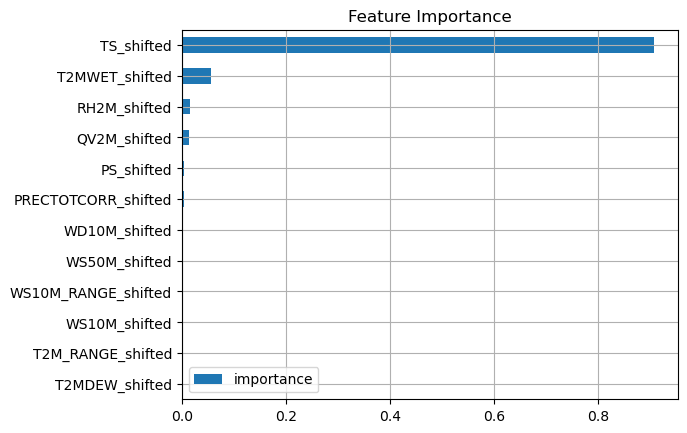

In [696]:
# Lets visualize thes feature importance
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.grid()
plt.show()


## Forcast on our Test Set with our trained Model


In [697]:
test['prediction'] = reg.predict(X_test)

In [699]:
df6 = df6.merge(test[['prediction']], how='left', left_index=True, right_index=True)

In [700]:
df6  # Now includes the prediction column for our test set

,YEAR,MO,DY,T2MDEW,T2M,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,...,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,QV2M,RH2M,PRECTOTCORR,prediction
Date,,,,,,,,,,,,,,,,,,,,,
1982-01-01,1982,1,1,23.42,28.15,25.78,28.76,-267.71,31.27,25.83,...,2.85,3.79,1.66,2.12,187.06,3.45,18.07,76.56,0.47,NaN
1982-01-02,1982,1,2,23.73,27.83,25.78,28.35,-268.09,30.97,25.90,...,3.35,4.72,1.84,2.88,212.44,4.12,18.43,79.31,1.50,NaN
1982-01-03,1982,1,3,23.60,27.49,25.55,28.20,-268.48,30.24,25.57,...,3.20,4.18,2.00,2.18,204.56,3.92,18.25,80.12,2.27,NaN
1982-01-04,1982,1,4,23.45,27.58,25.51,28.21,-268.56,30.21,25.62,...,3.09,3.48,2.34,1.14,211.81,3.78,18.07,79.06,1.96,NaN
1982-01-05,1982,1,5,22.99,27.33,25.16,27.98,-268.19,30.29,25.33,...,2.61,4.02,0.35,3.66,174.19,3.27,17.58,78.25,2.91,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,2022,12,27,22.17,27.16,24.67,27.23,-268.27,30.09,25.22,...,1.96,2.74,0.32,2.43,148.12,2.48,16.60,74.62,0.01,23.013977
2022-12-28,2022,12,28,22.33,27.15,24.73,27.19,-267.57,30.40,24.82,...,2.05,3.20,0.34,2.86,103.06,2.60,16.78,75.69,0.02,23.250015
2022-12-29,2022,12,29,23.24,27.15,25.19,27.53,-267.76,30.22,24.83,...,1.98,3.08,0.38,2.70,193.44,2.45,17.76,80.00,0.15,23.248215


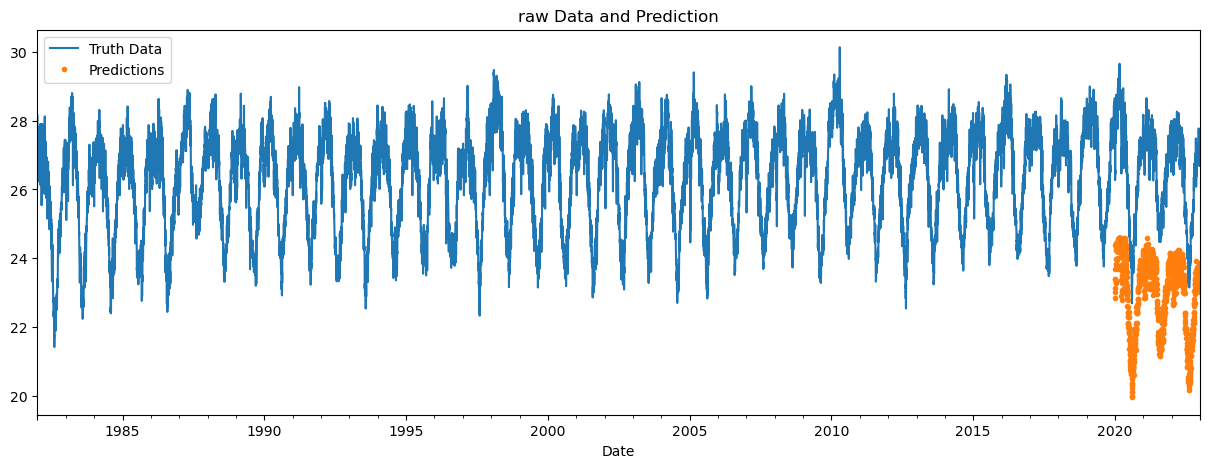

In [702]:
ax = df6[['T2M']].plot(figsize=(15,5))
df6['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('raw Data and Prediction')

plt.show()

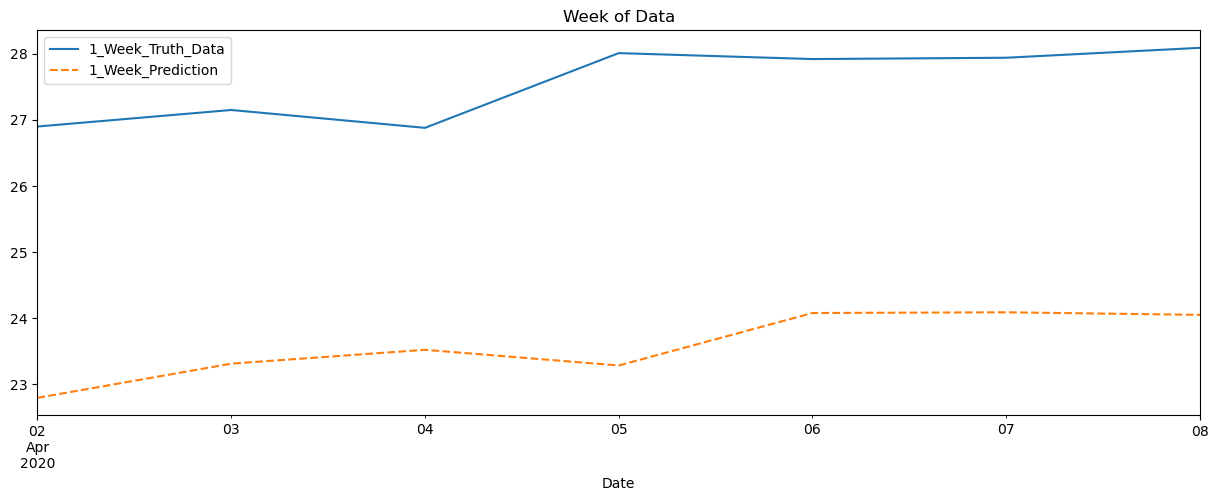

In [734]:
ax = df6.loc[(df6.index > '2020-04-01') & (df6.index < '2020-04-09')]['T2M'].plot(figsize=(15, 5), title='Week of Data')
df6.loc[(df6.index > '2020-04-01') & (df6.index < '2020-04-09')]['prediction'].plot(ls='--')

plt.legend(['1_Week_Truth_Data', '1_Week_Prediction'])
plt.show()


## Lets run our Evaluation metrics Again

In [742]:
score = np.sqrt(mean_squared_error(test['T2M'], test['prediction'])) ## Similar to what the model Generated at the latter end of execution

print(f'RMSE Score on Test set: {score:0.4}')

RMSE Score on Test set: 3.582


## Calculate the Error and Look at the Worst and Best Predicted Days

In [749]:
test['error'] = np.abs(test[TARGET].values.flatten() - test['prediction'].values.flatten())


In [752]:
test['date'] = test.index.date

In [755]:
test.groupby('date')['error'].mean() # Average Error for Each Day that was predicted

date
2020-01-01    3.714956
2020-01-02    3.746843
2020-01-03    2.869644
2020-01-04    3.430371
2020-01-05    3.437288
                ...   
2022-12-27    4.146023
2022-12-28    3.899985
2022-12-29    3.901785
2022-12-30    3.679644
2022-12-31    3.449985
Name: error, Length: 1096, dtype: float64

In [756]:
test.groupby('date')['error'].mean().sort_values(ascending=False).head(5)

date
2020-02-15    5.060694
2020-02-29    5.053246
2020-02-23    4.963246
2020-02-28    4.953246
2020-01-06    4.941693
Name: error, dtype: float64

 The worse predicted days was Mid FEBRUARY to ending of that month in 2020

In [762]:
test.groupby('date')['error'].mean().sort_values(ascending=True).head(5)

date
2022-06-16    2.272209
2021-06-26    2.404018
2020-09-23    2.451699
2021-06-21    2.515614
2021-10-23    2.577204
Name: error, dtype: float64

In [763]:
git.inti

NameError: name 'git' is not defined

The best predicted days was on the days above

# Nest Steps

- Create a more robust cross validation
 - Add more features from other weather / climate databases for improved performance
